### 1. 데이터 확인

In [1]:
import pandas as pd

df = pd.read_csv("/content/sample_data/WA_Marketing-Campaign.csv")

df.info()
df.head(3)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


### 2-1. 기초 통계

In [2]:
print("▶ MarketSize 분포")
print(df['MarketSize'].value_counts())

print("\n▶ Promotion 분포")
print(df['Promotion'].value_counts().sort_index())

print("\n▶ 프로모션별 매출 요약 통계")
print(df.groupby('Promotion')['SalesInThousands'].agg(['mean', 'std', 'count']).round(2))

▶ MarketSize 분포
MarketSize
Medium    320
Large     168
Small      60
Name: count, dtype: int64

▶ Promotion 분포
Promotion
1    172
2    188
3    188
Name: count, dtype: int64

▶ 프로모션별 매출 요약 통계
            mean    std  count
Promotion                     
1          58.10  16.55    172
2          47.33  15.11    188
3          55.36  16.77    188


### 2-2. 조건별 매출 분포 시각화

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

!apt-get update -qq
!apt-get install -qq fonts-nanum

import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
kfont = fm.FontProperties(fname=font_path)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [4]:
sns.set_theme(style="ticks", palette="pastel")

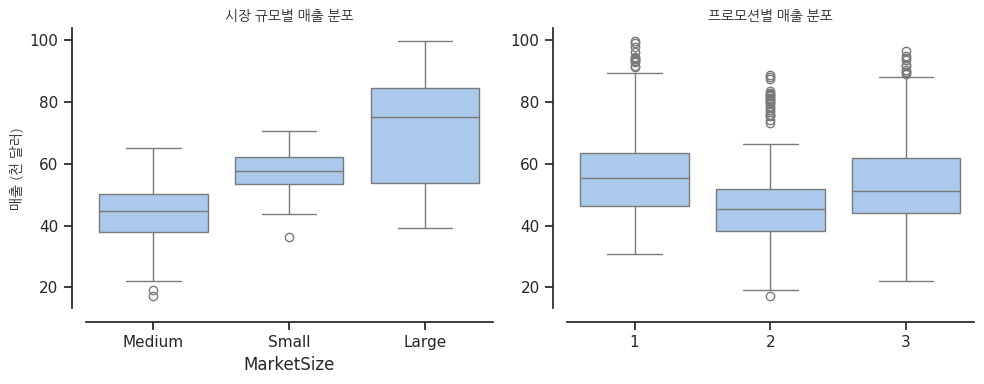

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x='MarketSize', y='SalesInThousands', data=df, ax=axes[0])
axes[0].set_title('시장 규모별 매출 분포',fontsize= 16, fontproperties=kfont)
axes[1].set_xlabel('')
axes[0].set_ylabel('매출 (천 달러)', fontproperties=kfont)
axes[0].tick_params(axis='x')
axes[0].tick_params(axis='y')
sns.despine(offset=10)

sns.boxplot(x='Promotion', y='SalesInThousands', data=df, ax=axes[1])
axes[1].set_title('프로모션별 매출 분포', fontsize= 16, fontproperties=kfont)
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x')
axes[1].tick_params(axis='y')

plt.tight_layout()
plt.show()

### 3. A/B 테스트


In [6]:
from scipy.stats import ttest_ind
import numpy as np

group1 = df[df['Promotion'] == 1]['SalesInThousands']
group2 = df[df['Promotion'] == 2]['SalesInThousands']
group3 = df[df['Promotion'] == 3]['SalesInThousands']

mean_diff_1_2 = group1.mean() - group2.mean()
mean_diff_1_3 = group1.mean() - group3.mean()

def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*x.std()**2 + (ny - 1)*y.std()**2) / (nx + ny - 2))
    return (x.mean() - y.mean()) / pooled_std

d_1_2 = cohens_d(group1, group2)
d_1_3 = cohens_d(group1, group3)

t1_2 = ttest_ind(group1, group2, equal_var=False)
t1_3 = ttest_ind(group1, group3, equal_var=False)

print("▶ Promotion 1 vs 2 평균 차이:", round(mean_diff_1_2, 2))
print("▶ Promotion 1 vs 2 p-value:", t1_2.pvalue)
print("▶ Promotion 1 vs 2 Cohen's d:", round(d_1_2, 2))

print("\n▶ Promotion 1 vs 3 평균 차이:", round(mean_diff_1_3, 2))
print("▶ Promotion 1 vs 3 p-value:", t1_3.pvalue)
print("▶ Promotion 1 vs 3 Cohen's d:", round(d_1_3, 2))

▶ Promotion 1 vs 2 평균 차이: 10.77
▶ Promotion 1 vs 2 p-value: 4.2903687179871785e-10
▶ Promotion 1 vs 2 Cohen's d: 0.68

▶ Promotion 1 vs 3 평균 차이: 2.73
▶ Promotion 1 vs 3 p-value: 0.12059147742229478
▶ Promotion 1 vs 3 Cohen's d: 0.16


### 4-1. 복합 회귀 분석



In [7]:
import statsmodels.formula.api as smf

df['MarketSize'] = df['MarketSize'].astype('category')

model = smf.ols('SalesInThousands ~ C(Promotion) + C(MarketSize) + AgeOfStore + week', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       SalesInThousands   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     125.6
Date:                Wed, 07 May 2025   Prob (F-statistic):           4.01e-99
Time:                        07:56:59   Log-Likelihood:                -2082.7
No. Observations:                 548   AIC:                             4179.
Df Residuals:                     541   BIC:                             4209.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### 4-2. 교호작용 분석

In [8]:
interaction_model = smf.ols(
    'SalesInThousands ~ C(Promotion) * C(MarketSize) + C(Promotion) * AgeOfStore + week',
    data=df
).fit()

print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:       SalesInThousands   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     66.27
Date:                Wed, 07 May 2025   Prob (F-statistic):           1.42e-97
Time:                        07:56:59   Log-Likelihood:                -2072.2
No. Observations:                 548   AIC:                             4170.
Df Residuals:                     535   BIC:                             4226.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### 5. 조건별 예측 시뮬레이션

In [9]:
import itertools
import pandas as pd

market_sizes = ['Large', 'Medium', 'Small']
age_values = [2, 10, 20]
week_values = [1, 2, 3, 4]
promotions = [1, 2, 3]

combinations = list(itertools.product(promotions, market_sizes, age_values, week_values))

simul_df = pd.DataFrame(combinations, columns=['Promotion', 'MarketSize', 'AgeOfStore', 'week'])

simul_df['predicted_sales'] = interaction_model.predict(simul_df)

result = simul_df.groupby(['MarketSize', 'AgeOfStore', 'week']).apply(
    lambda x: x.loc[x['predicted_sales'].idxmax()]
).reset_index(drop=True)

result.head(10)


<ipython-input-9-7313cbd6498e>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = simul_df.groupby(['MarketSize', 'AgeOfStore', 'week']).apply(


,Promotion,MarketSize,AgeOfStore,week,predicted_sales
0,3,Large,2,1,76.377207
1,3,Large,2,2,76.212754
2,3,Large,2,3,76.048301
3,3,Large,2,4,75.883849
4,3,Large,10,1,78.123806
5,3,Large,10,2,77.959353
6,3,Large,10,3,77.794900
7,3,Large,10,4,77.630448
8,3,Large,20,1,80.307054
9,3,Large,20,2,80.142602


In [10]:
result_large = result[result['MarketSize'] == 'Large'].sort_values(['AgeOfStore', 'week'])
result_medium = result[result['MarketSize'] == 'Medium'].sort_values(['AgeOfStore', 'week'])
result_small = result[result['MarketSize'] == 'Small'].sort_values(['AgeOfStore', 'week'])

print("▶ Large 시장 조건별 최적 프로모션")
print(result_large[['AgeOfStore', 'week', 'Promotion', 'predicted_sales']].head(5))

print("\n▶ Medium 시장 조건별 최적 프로모션")
print(result_medium[['AgeOfStore', 'week', 'Promotion', 'predicted_sales']].head(5))

print("\n▶ Small 시장 조건별 최적 프로모션")
print(result_small[['AgeOfStore', 'week', 'Promotion', 'predicted_sales']].head(5))


▶ Large 시장 조건별 최적 프로모션
   AgeOfStore  week  Promotion  predicted_sales
0           2     1          3        76.377207
1           2     2          3        76.212754
2           2     3          3        76.048301
3           2     4          3        75.883849
4          10     1          3        78.123806

▶ Medium 시장 조건별 최적 프로모션
    AgeOfStore  week  Promotion  predicted_sales
12           2     1          1        47.571419
13           2     2          1        47.406967
14           2     3          1        47.242514
15           2     4          1        47.078062
16          10     1          1        47.962003

▶ Small 시장 조건별 최적 프로모션
    AgeOfStore  week  Promotion  predicted_sales
24           2     1          1        59.969772
25           2     2          1        59.805320
26           2     3          1        59.640867
27           2     4          1        59.476414
28          10     1          1        60.360356
